# 06. Training and Evaluation Patterns - Professional ML Development 🏆

Welcome to the **most important** notebook for becoming a professional ML practitioner! 🚀

Everything you've learned so far comes together here. This notebook teaches you the **patterns and best practices** that separate hobbyists from professionals in machine learning.

## 🎯 Learning Objectives

Master the essential skills for production-ready ML:

- **Professional training loops** with proper validation and monitoring
- **Model evaluation strategies** beyond simple accuracy metrics
- **Debugging techniques** to identify and fix training issues
- **Performance optimization** for faster, better training
- **Experiment tracking** to manage multiple model versions
- **Early stopping** to prevent overfitting automatically
- **Model checkpointing** to save and resume training safely

## 🧩 What You'll Build

- **Professional training framework** with comprehensive monitoring
- **Advanced evaluation suite** with multiple metrics and visualizations
- **Debugging toolkit** to diagnose training problems
- **Experiment tracker** to compare different approaches
- **Production-ready patterns** used by ML teams at top companies

## 🌟 Why This Matters

The difference between research code and production code:

| Amateur Approach                 | Professional Approach             |
| -------------------------------- | --------------------------------- |
| 🎲 Trial and error training      | 📊 Systematic experimentation     |
| 🤷‍♂️ "It works on my machine"      | ✅ Reproducible, robust training  |
| 📈 Single accuracy metric        | 📊 Comprehensive evaluation suite |
| 🚫 Manual monitoring             | 🤖 Automated tracking and alerts  |
| 💥 Training crashes and restarts | 💾 Checkpointing and recovery     |

Let's transform you into a professional ML engineer! 💪


## 🛠️ Professional Setup & Environment

Professional ML development starts with proper environment setup. Let's establish the foundation for robust, reproducible training.


In [1]:
# Essential imports for professional ML development
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
)
import time
import copy
import json
from collections import defaultdict
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")


# Professional random seed management
def set_seeds(seed=42):
    """Set all random seeds for reproducibility"""
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


set_seeds(42)


# Smart device selection
def get_device():
    """Get the best available device"""
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print(f"🔥 Using GPU: {torch.cuda.get_device_name()}")
        print(
            f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB"
        )
    elif torch.backends.mps.is_available():
        device = torch.device("mps")
        print("🍎 Using Apple Silicon GPU")
    else:
        device = torch.device("cpu")
        print("💻 Using CPU")
    return device


device = get_device()


# Professional directory structure
def setup_directories():
    """Create organized directory structure for ML projects"""
    directories = ["models", "experiments", "plots", "logs", "checkpoints"]
    for dir_name in directories:
        Path(dir_name).mkdir(exist_ok=True)
    print("📁 Project directories created!")


setup_directories()

# Enhanced plotting setup
plt.style.use("default")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.3

print(f"✅ Professional environment ready!")
print(f"📦 PyTorch version: {torch.__version__}")
print(f"🎯 Device: {device}")

🍎 Using Apple Silicon GPU
📁 Project directories created!
✅ Professional environment ready!
📦 PyTorch version: 2.7.1
🎯 Device: mps


## 📊 Professional Data Pipeline

Professional ML starts with robust data handling. Let's create a comprehensive data pipeline that handles real-world scenarios.


In [2]:
# Professional data creation and management
class DataManager:
    """Professional data handling with comprehensive logging and validation"""

    def __init__(self, random_state=42):
        self.random_state = random_state
        self.data_info = {}

    def create_classification_data(
        self, n_samples=2000, n_features=20, difficulty="medium"
    ):
        """
        Create realistic classification datasets with different difficulty levels
        """
        print("🎲 Creating professional classification dataset...")

        # Adjust dataset difficulty
        difficulty_params = {
            "easy": {
                "n_informative": 18,
                "n_redundant": 2,
                "class_sep": 2.0,
                "noise": 0.1,
            },
            "medium": {
                "n_informative": 15,
                "n_redundant": 5,
                "class_sep": 1.0,
                "noise": 0.2,
            },
            "hard": {
                "n_informative": 10,
                "n_redundant": 5,
                "class_sep": 0.5,
                "noise": 0.3,
            },
        }

        params = difficulty_params[difficulty]

        X, y = make_classification(
            n_samples=n_samples,
            n_features=n_features,
            n_informative=params["n_informative"],
            n_redundant=params["n_redundant"],
            n_clusters_per_class=1,
            class_sep=params["class_sep"],
            flip_y=params["noise"],
            random_state=self.random_state,
        )

        # Convert to PyTorch tensors with proper dtype
        X = torch.FloatTensor(X)
        y = torch.LongTensor(y)

        # Store dataset information
        self.data_info = {
            "n_samples": n_samples,
            "n_features": n_features,
            "difficulty": difficulty,
            "class_distribution": torch.bincount(y).tolist(),
            "feature_means": X.mean(dim=0),
            "feature_stds": X.std(dim=0),
        }

        print(f"✅ Dataset created successfully!")
        print(f"   📊 Shape: {X.shape}")
        print(f"   🎯 Classes: {torch.unique(y).tolist()}")
        print(f"   ⚖️ Balance: {self.data_info['class_distribution']}")
        print(f"   🎢 Difficulty: {difficulty}")

        return X, y

    def create_professional_splits(
        self, X, y, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1
    ):
        """
        Create proper train/validation/test splits with stratification
        """
        print(f"✂️ Creating professional data splits...")

        # Verify ratios sum to 1
        assert (
            abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6
        ), "Ratios must sum to 1.0"

        dataset = TensorDataset(X, y)
        n_total = len(dataset)

        # Calculate sizes
        train_size = int(train_ratio * n_total)
        val_size = int(val_ratio * n_total)
        test_size = n_total - train_size - val_size

        # Create splits
        train_dataset, val_dataset, test_dataset = random_split(
            dataset,
            [train_size, val_size, test_size],
            generator=torch.Generator().manual_seed(self.random_state),
        )

        print(f"📊 Split sizes:")
        print(
            f"   🏋️ Train: {len(train_dataset)} ({len(train_dataset)/n_total*100:.1f}%)"
        )
        print(
            f"   ✅ Validation: {len(val_dataset)} ({len(val_dataset)/n_total*100:.1f}%)"
        )
        print(f"   🧪 Test: {len(test_dataset)} ({len(test_dataset)/n_total*100:.1f}%)")

        return train_dataset, val_dataset, test_dataset

    def create_data_loaders(
        self, train_dataset, val_dataset, test_dataset, batch_size=64, num_workers=0
    ):
        """
        Create optimized data loaders for training
        """
        print(f"🔄 Creating data loaders (batch_size={batch_size})...")

        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers=num_workers,
            pin_memory=True if device.type == "cuda" else False,
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=num_workers,
            pin_memory=True if device.type == "cuda" else False,
        )

        test_loader = DataLoader(
            test_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=num_workers,
            pin_memory=True if device.type == "cuda" else False,
        )

        print(f"✅ Data loaders ready!")
        print(f"   🔄 Train batches: {len(train_loader)}")
        print(f"   ✅ Val batches: {len(val_loader)}")
        print(f"   🧪 Test batches: {len(test_loader)}")

        return train_loader, val_loader, test_loader


# Create our professional data pipeline
data_manager = DataManager()
X, y = data_manager.create_classification_data(n_samples=2000, difficulty="medium")
train_dataset, val_dataset, test_dataset = data_manager.create_professional_splits(X, y)
train_loader, val_loader, test_loader = data_manager.create_data_loaders(
    train_dataset, val_dataset, test_dataset, batch_size=64
)

🎲 Creating professional classification dataset...
✅ Dataset created successfully!
   📊 Shape: torch.Size([2000, 20])
   🎯 Classes: [0, 1]
   ⚖️ Balance: [1009, 991]
   🎢 Difficulty: medium
✂️ Creating professional data splits...
📊 Split sizes:
   🏋️ Train: 1400 (70.0%)
   ✅ Validation: 400 (20.0%)
   🧪 Test: 200 (10.0%)
🔄 Creating data loaders (batch_size=64)...
✅ Data loaders ready!
   🔄 Train batches: 22
   ✅ Val batches: 7
   🧪 Test batches: 4


## The Complete Training Loop

Here's a comprehensive training loop that includes all the essential components:


In [4]:
class Trainer:
    """
    A comprehensive trainer class that handles the complete training process.
    """

    def __init__(self, model, train_loader, val_loader, criterion, optimizer, device):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device

        # Training history
        self.history = {
            "train_loss": [],
            "train_acc": [],
            "val_loss": [],
            "val_acc": [],
            "learning_rates": [],
        }

        # Best model tracking
        self.best_val_acc = 0.0
        self.best_model_state = None
        self.epochs_without_improvement = 0

    def train_epoch(self):
        """
        Train the model for one epoch.
        """
        self.model.train()  # Set model to training mode

        total_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for batch_idx, (data, targets) in enumerate(self.train_loader):
            # Move data to device
            data, targets = data.to(self.device), targets.to(self.device)

            # Zero gradients
            self.optimizer.zero_grad()

            # Forward pass
            outputs = self.model(data)
            loss = self.criterion(outputs, targets)

            # Backward pass
            loss.backward()

            # Update parameters
            self.optimizer.step()

            # Statistics
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_samples += targets.size(0)
            correct_predictions += (predicted == targets).sum().item()

        # Calculate metrics
        avg_loss = total_loss / len(self.train_loader)
        accuracy = correct_predictions / total_samples

        return avg_loss, accuracy

    def validate_epoch(self):
        """
        Validate the model for one epoch.
        """
        self.model.eval()  # Set model to evaluation mode

        total_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        with torch.inference_mode():  # Disable gradient computation
            for data, targets in self.val_loader:
                # Move data to device
                data, targets = data.to(self.device), targets.to(self.device)

                # Forward pass
                outputs = self.model(data)
                loss = self.criterion(outputs, targets)

                # Statistics
                total_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_samples += targets.size(0)
                correct_predictions += (predicted == targets).sum().item()

        # Calculate metrics
        avg_loss = total_loss / len(self.val_loader)
        accuracy = correct_predictions / total_samples

        return avg_loss, accuracy

    def save_checkpoint(self, epoch, filepath):
        """
        Save model checkpoint.
        """
        checkpoint = {
            "epoch": epoch,
            "model_state_dict": self.model.state_dict(),
            "optimizer_state_dict": self.optimizer.state_dict(),
            "best_val_acc": self.best_val_acc,
            "history": self.history,
        }
        torch.save(checkpoint, filepath)

    def load_checkpoint(self, filepath):
        """
        Load model checkpoint.
        """
        checkpoint = torch.load(filepath, map_location=self.device)
        self.model.load_state_dict(checkpoint["model_state_dict"])
        self.optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
        self.best_val_acc = checkpoint["best_val_acc"]
        self.history = checkpoint["history"]
        return checkpoint["epoch"]

    def train(
        self,
        num_epochs,
        save_path="models/best_model.pth",
        early_stopping_patience=10,
        verbose=True,
    ):
        """
        Complete training loop with early stopping and checkpointing.
        """
        print(f"Starting training for {num_epochs} epochs...")
        print(f"Model will be saved to: {save_path}")
        print("-" * 50)

        start_time = time.time()

        for epoch in range(num_epochs):
            epoch_start_time = time.time()

            # Training phase
            train_loss, train_acc = self.train_epoch()

            # Validation phase
            val_loss, val_acc = self.validate_epoch()

            # Record metrics
            self.history["train_loss"].append(train_loss)
            self.history["train_acc"].append(train_acc)
            self.history["val_loss"].append(val_loss)
            self.history["val_acc"].append(val_acc)
            self.history["learning_rates"].append(self.optimizer.param_groups[0]["lr"])

            # Check for improvement
            if val_acc > self.best_val_acc:
                self.best_val_acc = val_acc
                self.best_model_state = copy.deepcopy(self.model.state_dict())
                self.epochs_without_improvement = 0

                # Save best model
                self.save_checkpoint(epoch, save_path)

                if verbose:
                    print(f"✓ New best validation accuracy: {val_acc:.4f}")
            else:
                self.epochs_without_improvement += 1

            # Print epoch results
            if verbose:
                epoch_time = time.time() - epoch_start_time
                print(
                    f"Epoch {epoch+1}/{num_epochs} ({epoch_time:.2f}s) - "
                    f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
                    f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}"
                )

            # Early stopping check
            if self.epochs_without_improvement >= early_stopping_patience:
                print(f"\nEarly stopping triggered after {epoch+1} epochs")
                print(
                    f"No improvement for {early_stopping_patience} consecutive epochs"
                )
                break

        # Load best model
        if self.best_model_state is not None:
            self.model.load_state_dict(self.best_model_state)

        total_time = time.time() - start_time
        print(f"\nTraining completed in {total_time:.2f} seconds")
        print(f"Best validation accuracy: {self.best_val_acc:.4f}")

        return self.history


# Define a simple classifier model
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Initialize training components
model = SimpleClassifier(input_size=20, hidden_size=64, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create trainer
trainer = Trainer(model, train_loader, val_loader, criterion, optimizer, device)

print("Trainer initialized and ready for training!")

Trainer initialized and ready for training!


## Training the Model

Now let's train our model using the comprehensive training loop:


In [5]:
# Train the model
history = trainer.train(
    num_epochs=50,
    save_path="models/classification_model.pth",
    early_stopping_patience=8,
    verbose=True,
)

Starting training for 50 epochs...
Model will be saved to: models/classification_model.pth
--------------------------------------------------
✓ New best validation accuracy: 0.8075
Epoch 1/50 (0.73s) - Train Loss: 0.6540, Train Acc: 0.6136, Val Loss: 0.4937, Val Acc: 0.8075
✓ New best validation accuracy: 0.8475
Epoch 2/50 (0.07s) - Train Loss: 0.4688, Train Acc: 0.8250, Val Loss: 0.4185, Val Acc: 0.8475
✓ New best validation accuracy: 0.8650
Epoch 3/50 (0.06s) - Train Loss: 0.4308, Train Acc: 0.8507, Val Loss: 0.3971, Val Acc: 0.8650
✓ New best validation accuracy: 0.8675
Epoch 4/50 (0.06s) - Train Loss: 0.4182, Train Acc: 0.8586, Val Loss: 0.3879, Val Acc: 0.8675
✓ New best validation accuracy: 0.8700
Epoch 5/50 (0.07s) - Train Loss: 0.4073, Train Acc: 0.8643, Val Loss: 0.3825, Val Acc: 0.8700
✓ New best validation accuracy: 0.8800
Epoch 6/50 (0.06s) - Train Loss: 0.4004, Train Acc: 0.8657, Val Loss: 0.3780, Val Acc: 0.8800
Epoch 7/50 (0.06s) - Train Loss: 0.3923, Train Acc: 0.8714, 

## Visualizing Training Progress

Let's create comprehensive visualizations of the training process:


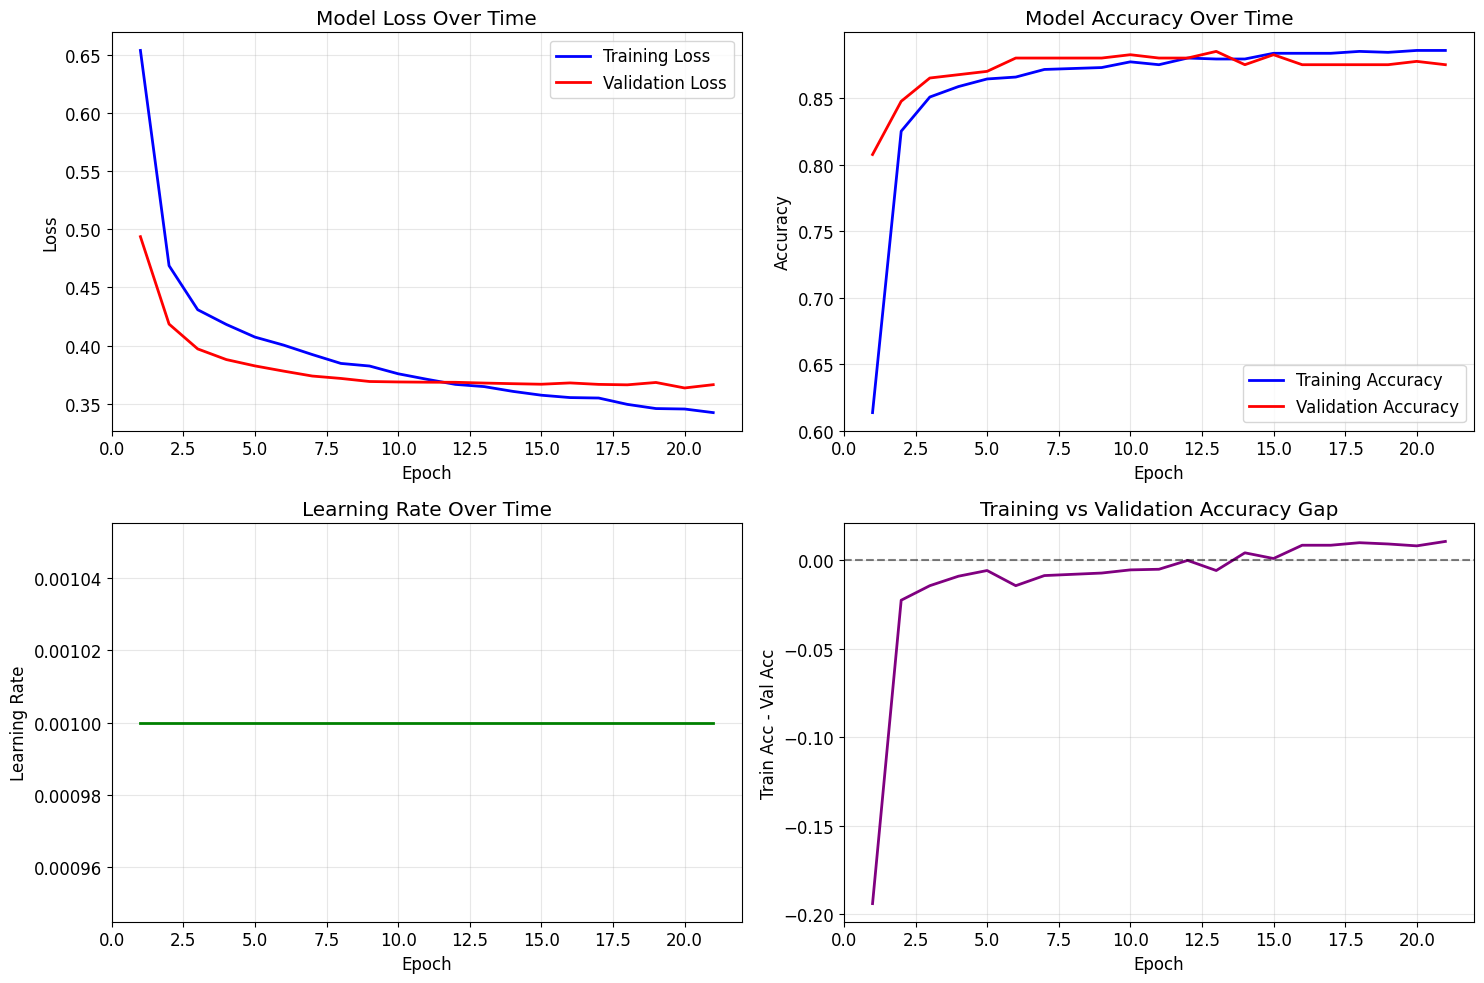

Training Summary:
  Final Training Loss: 0.3423
  Final Validation Loss: 0.3663
  Final Training Accuracy: 0.8857
  Final Validation Accuracy: 0.8750
  Best Validation Accuracy: 0.8850
  Total Epochs: 21


In [6]:
def plot_training_history(history):
    """
    Plot comprehensive training history.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    epochs = range(1, len(history["train_loss"]) + 1)

    # Loss plot
    axes[0, 0].plot(
        epochs, history["train_loss"], "b-", label="Training Loss", linewidth=2
    )
    axes[0, 0].plot(
        epochs, history["val_loss"], "r-", label="Validation Loss", linewidth=2
    )
    axes[0, 0].set_title("Model Loss Over Time")
    axes[0, 0].set_xlabel("Epoch")
    axes[0, 0].set_ylabel("Loss")
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Accuracy plot
    axes[0, 1].plot(
        epochs, history["train_acc"], "b-", label="Training Accuracy", linewidth=2
    )
    axes[0, 1].plot(
        epochs, history["val_acc"], "r-", label="Validation Accuracy", linewidth=2
    )
    axes[0, 1].set_title("Model Accuracy Over Time")
    axes[0, 1].set_xlabel("Epoch")
    axes[0, 1].set_ylabel("Accuracy")
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Learning rate plot
    axes[1, 0].plot(epochs, history["learning_rates"], "g-", linewidth=2)
    axes[1, 0].set_title("Learning Rate Over Time")
    axes[1, 0].set_xlabel("Epoch")
    axes[1, 0].set_ylabel("Learning Rate")
    axes[1, 0].grid(True, alpha=0.3)

    # Overfitting detection
    train_val_diff = np.array(history["train_acc"]) - np.array(history["val_acc"])
    axes[1, 1].plot(epochs, train_val_diff, "purple", linewidth=2)
    axes[1, 1].axhline(y=0, color="black", linestyle="--", alpha=0.5)
    axes[1, 1].set_title("Training vs Validation Accuracy Gap")
    axes[1, 1].set_xlabel("Epoch")
    axes[1, 1].set_ylabel("Train Acc - Val Acc")
    axes[1, 1].grid(True, alpha=0.3)

    # Add annotations
    if len(train_val_diff) > 0:
        max_gap = np.max(train_val_diff)
        if max_gap > 0.1:
            axes[1, 1].text(
                0.5,
                0.9,
                "Potential Overfitting Detected!",
                transform=axes[1, 1].transAxes,
                bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.7),
                horizontalalignment="center",
            )

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("Training Summary:")
    print(f"  Final Training Loss: {history['train_loss'][-1]:.4f}")
    print(f"  Final Validation Loss: {history['val_loss'][-1]:.4f}")
    print(f"  Final Training Accuracy: {history['train_acc'][-1]:.4f}")
    print(f"  Final Validation Accuracy: {history['val_acc'][-1]:.4f}")
    print(f"  Best Validation Accuracy: {max(history['val_acc']):.4f}")
    print(f"  Total Epochs: {len(history['train_loss'])}")


# Plot training history
plot_training_history(history)

## Model Evaluation

Let's create a comprehensive evaluation framework:



Validation Evaluation Results:
----------------------------------------
  Loss: 0.3677
  Accuracy: 0.8850
  Precision: 0.8857
  Recall: 0.8850
  F1-Score: 0.8848

Test Evaluation Results:
----------------------------------------
  Loss: 0.4853
  Accuracy: 0.9100
  Precision: 0.9119
  Recall: 0.9100
  F1-Score: 0.9101


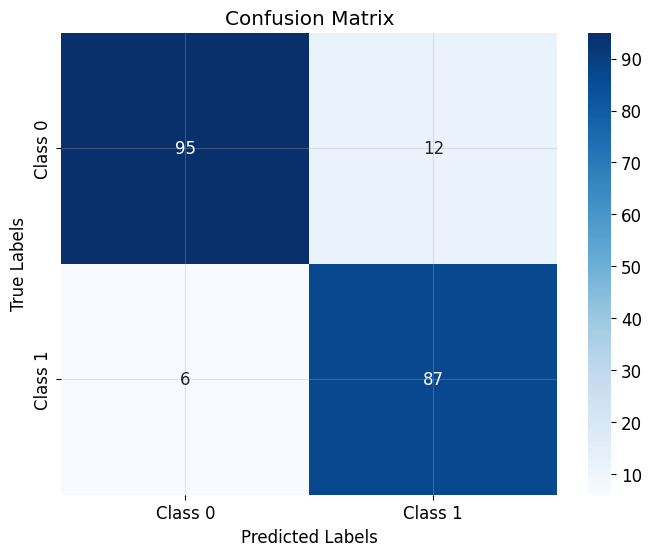

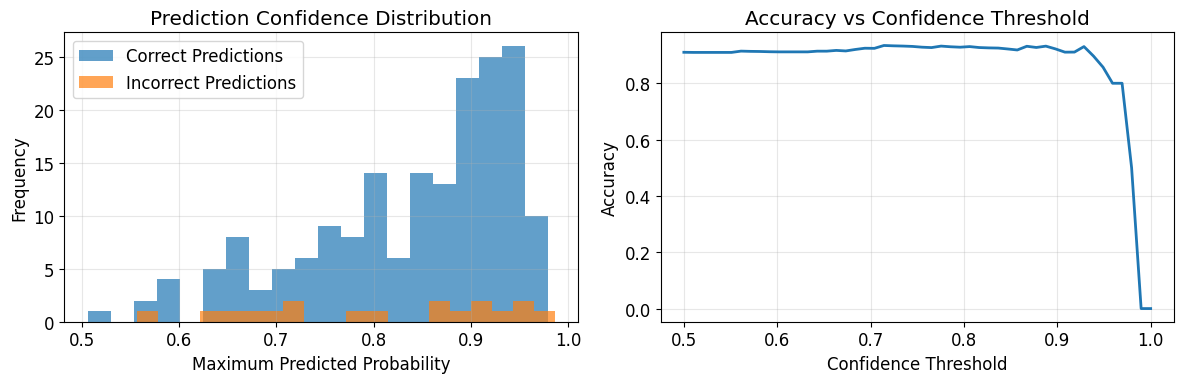

In [7]:
class ModelEvaluator:
    """
    Comprehensive model evaluation class.
    """

    def __init__(self, model, device):
        self.model = model
        self.device = device

    def evaluate_on_loader(self, data_loader, dataset_name="Dataset"):
        """
        Evaluate model on a data loader.
        """
        self.model.eval()

        all_predictions = []
        all_targets = []
        all_probabilities = []
        total_loss = 0.0

        criterion = nn.CrossEntropyLoss()

        with torch.inference_mode():
            for data, targets in data_loader:
                data, targets = data.to(self.device), targets.to(self.device)

                outputs = self.model(data)
                loss = criterion(outputs, targets)

                # Get predictions and probabilities
                probabilities = F.softmax(outputs, dim=1)
                _, predictions = torch.max(outputs, 1)

                # Store results
                all_predictions.extend(predictions.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())
                all_probabilities.extend(probabilities.cpu().numpy())
                total_loss += loss.item()

        # Calculate metrics
        avg_loss = total_loss / len(data_loader)
        accuracy = accuracy_score(all_targets, all_predictions)
        precision, recall, f1, _ = precision_recall_fscore_support(
            all_targets, all_predictions, average="weighted"
        )

        results = {
            "loss": avg_loss,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "predictions": all_predictions,
            "targets": all_targets,
            "probabilities": all_probabilities,
        }

        # Print results
        print(f"\n{dataset_name} Evaluation Results:")
        print("-" * 40)
        print(f"  Loss: {avg_loss:.4f}")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")

        return results

    def plot_confusion_matrix(self, targets, predictions, class_names=None):
        """
        Plot confusion matrix.
        """
        cm = confusion_matrix(targets, predictions)

        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=class_names or range(len(cm)),
            yticklabels=class_names or range(len(cm)),
        )
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

        return cm

    def plot_prediction_confidence(self, probabilities, targets, predictions):
        """
        Plot prediction confidence distribution.
        """
        probabilities = np.array(probabilities)
        max_probs = np.max(probabilities, axis=1)

        correct_mask = np.array(targets) == np.array(predictions)

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.hist(
            max_probs[correct_mask], alpha=0.7, label="Correct Predictions", bins=20
        )
        plt.hist(
            max_probs[~correct_mask], alpha=0.7, label="Incorrect Predictions", bins=20
        )
        plt.xlabel("Maximum Predicted Probability")
        plt.ylabel("Frequency")
        plt.title("Prediction Confidence Distribution")
        plt.legend()

        plt.subplot(1, 2, 2)
        confidence_threshold = np.linspace(0.5, 1.0, 50)
        accuracies = []

        for threshold in confidence_threshold:
            high_confidence_mask = max_probs >= threshold
            if np.sum(high_confidence_mask) > 0:
                acc = np.mean(correct_mask[high_confidence_mask])
                accuracies.append(acc)
            else:
                accuracies.append(0)

        plt.plot(confidence_threshold, accuracies, linewidth=2)
        plt.xlabel("Confidence Threshold")
        plt.ylabel("Accuracy")
        plt.title("Accuracy vs Confidence Threshold")
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()


# Create evaluator and evaluate on all splits
evaluator = ModelEvaluator(trainer.model, device)

# Evaluate on validation set
val_results = evaluator.evaluate_on_loader(val_loader, "Validation")

# Evaluate on test set
test_results = evaluator.evaluate_on_loader(test_loader, "Test")

# Plot confusion matrix
class_names = ["Class 0", "Class 1"]
cm = evaluator.plot_confusion_matrix(
    test_results["targets"], test_results["predictions"], class_names
)

# Plot prediction confidence
evaluator.plot_prediction_confidence(
    test_results["probabilities"], test_results["targets"], test_results["predictions"]
)

## Model Debugging and Diagnostics

Let's create tools for debugging common training issues:



🔍 TRAINING DIAGNOSTICS
✅ HEALTHY TRAINING:
   Good performance with minimal overfitting


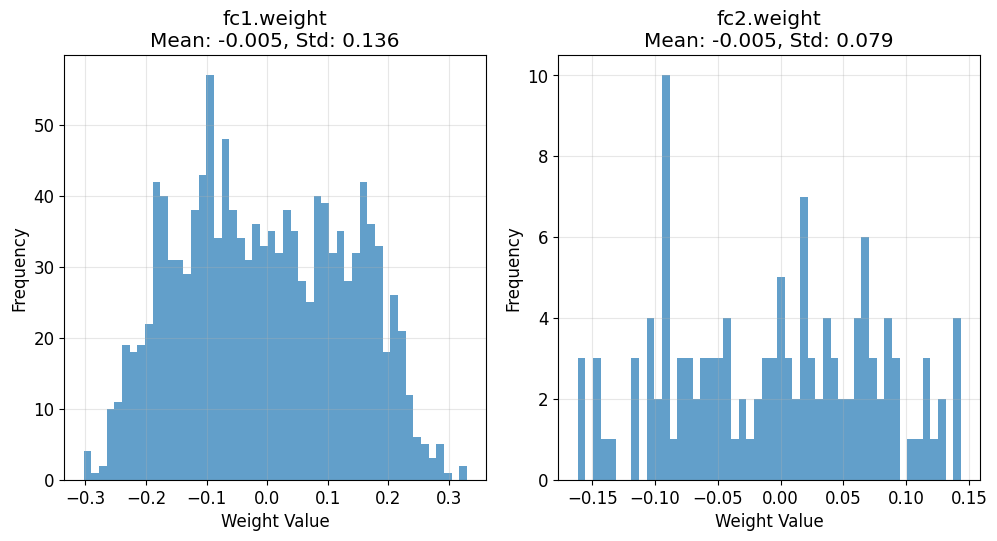


Weight Analysis:
  fc1.weight:
    Mean: -0.005065, Std: 0.135672
    Range: [-0.303082, 0.329440]
  fc2.weight:
    Mean: -0.005439, Std: 0.078962
    Range: [-0.161655, 0.143432]


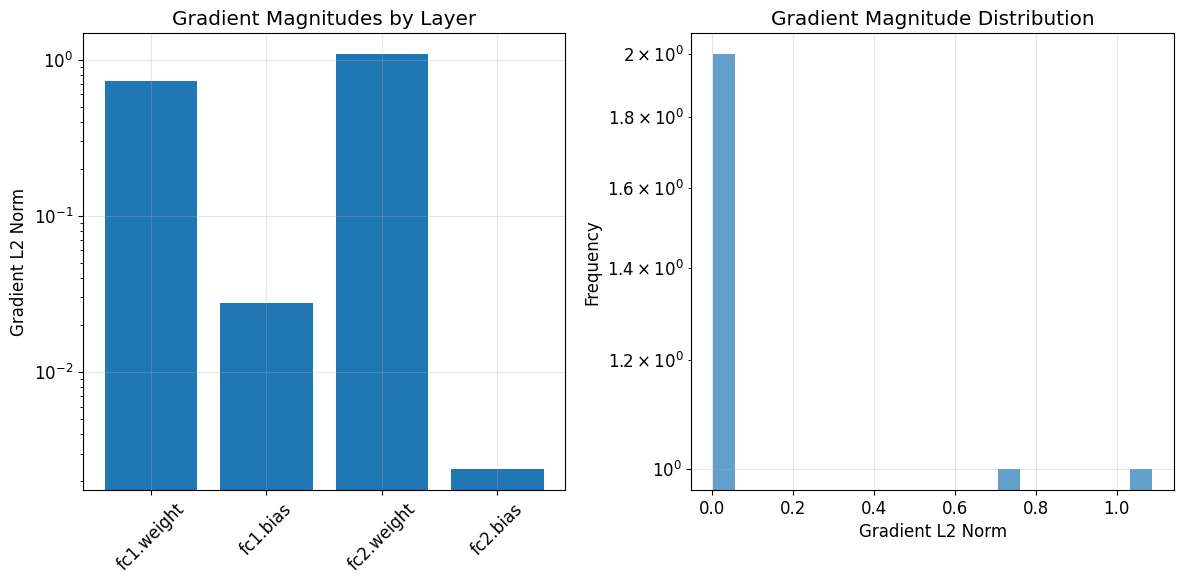


Gradient Analysis:
  Average gradient magnitude: 0.462764
  ✅ Gradient magnitudes appear normal


In [8]:
class ModelDiagnostics:
    """
    Tools for diagnosing model training issues.
    """

    @staticmethod
    def analyze_gradients(model):
        """
        Analyze gradient magnitudes to detect vanishing/exploding gradients.
        """
        gradients = []
        layer_names = []

        for name, param in model.named_parameters():
            if param.grad is not None:
                grad_norm = param.grad.data.norm(2).item()
                gradients.append(grad_norm)
                layer_names.append(name)

        # Plot gradient magnitudes
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.bar(range(len(gradients)), gradients)
        plt.xticks(range(len(gradients)), layer_names, rotation=45)
        plt.ylabel("Gradient L2 Norm")
        plt.title("Gradient Magnitudes by Layer")
        plt.yscale("log")

        plt.subplot(1, 2, 2)
        plt.hist(gradients, bins=20, alpha=0.7)
        plt.xlabel("Gradient L2 Norm")
        plt.ylabel("Frequency")
        plt.title("Gradient Magnitude Distribution")
        plt.yscale("log")

        plt.tight_layout()
        plt.show()

        # Diagnostic messages
        avg_grad = np.mean(gradients)
        print(f"\nGradient Analysis:")
        print(f"  Average gradient magnitude: {avg_grad:.6f}")

        if avg_grad < 1e-7:
            print(
                "  ⚠️  Very small gradients detected - possible vanishing gradient problem"
            )
        elif avg_grad > 10:
            print("  ⚠️  Large gradients detected - possible exploding gradient problem")
        else:
            print("  ✅ Gradient magnitudes appear normal")

        return gradients, layer_names

    @staticmethod
    def analyze_weights(model):
        """
        Analyze weight distributions.
        """
        weight_stats = []

        plt.figure(figsize=(15, 10))

        subplot_idx = 1
        for name, param in model.named_parameters():
            if "weight" in name and param.dim() > 1:  # Only analyze weight matrices
                weights = param.data.cpu().numpy().flatten()

                stats = {
                    "name": name,
                    "mean": np.mean(weights),
                    "std": np.std(weights),
                    "min": np.min(weights),
                    "max": np.max(weights),
                }
                weight_stats.append(stats)

                # Plot weight distribution
                plt.subplot(2, 3, subplot_idx)
                plt.hist(weights, bins=50, alpha=0.7)
                plt.title(f'{name}\nMean: {stats["mean"]:.3f}, Std: {stats["std"]:.3f}')
                plt.xlabel("Weight Value")
                plt.ylabel("Frequency")

                subplot_idx += 1
                if subplot_idx > 6:  # Limit to 6 subplots
                    break

        plt.tight_layout()
        plt.show()

        # Print weight statistics
        print("\nWeight Analysis:")
        for stats in weight_stats:
            print(f"  {stats['name']}:")
            print(f"    Mean: {stats['mean']:.6f}, Std: {stats['std']:.6f}")
            print(f"    Range: [{stats['min']:.6f}, {stats['max']:.6f}]")

        return weight_stats

    @staticmethod
    def diagnose_training_issues(history):
        """
        Diagnose common training issues from training history.
        """
        print("\n🔍 TRAINING DIAGNOSTICS")
        print("=" * 40)

        train_loss = history["train_loss"]
        val_loss = history["val_loss"]
        train_acc = history["train_acc"]
        val_acc = history["val_acc"]

        # Check for overfitting
        if len(train_loss) > 5:
            recent_train_loss = np.mean(train_loss[-5:])
            recent_val_loss = np.mean(val_loss[-5:])

            if recent_val_loss > recent_train_loss * 1.2:
                print("⚠️  OVERFITTING DETECTED:")
                print("   Validation loss is significantly higher than training loss")
                print("   Suggestions:")
                print("   • Add more regularization (dropout, weight decay)")
                print("   • Reduce model complexity")
                print("   • Get more training data")
                print("   • Use early stopping")

        # Check for underfitting
        if train_acc[-1] < 0.8 and val_acc[-1] < 0.8:
            print("⚠️  UNDERFITTING DETECTED:")
            print("   Both training and validation accuracy are low")
            print("   Suggestions:")
            print("   • Increase model complexity")
            print("   • Reduce regularization")
            print("   • Train for more epochs")
            print("   • Increase learning rate")

        # Check learning rate
        if len(train_loss) > 10:
            early_loss = np.mean(train_loss[:5])
            recent_loss = np.mean(train_loss[-5:])
            improvement = (early_loss - recent_loss) / early_loss

            if improvement < 0.1:
                print("⚠️  SLOW CONVERGENCE:")
                print("   Loss is not decreasing significantly")
                print("   Suggestions:")
                print("   • Increase learning rate")
                print("   • Use a different optimizer (try Adam if using SGD)")
                print("   • Check data preprocessing")

        # Check for training instability
        loss_variance = np.var(train_loss[-10:]) if len(train_loss) >= 10 else 0
        if loss_variance > 0.1:
            print("⚠️  TRAINING INSTABILITY:")
            print("   Training loss is very noisy")
            print("   Suggestions:")
            print("   • Reduce learning rate")
            print("   • Use gradient clipping")
            print("   • Increase batch size")
            print("   • Use learning rate scheduling")

        # Positive feedback
        if (
            train_acc[-1] > 0.85
            and val_acc[-1] > 0.8
            and abs(train_acc[-1] - val_acc[-1]) < 0.1
        ):
            print("✅ HEALTHY TRAINING:")
            print("   Good performance with minimal overfitting")


# Perform diagnostics
diagnostics = ModelDiagnostics()

# Analyze training history
diagnostics.diagnose_training_issues(history)

# Analyze current model weights
weight_stats = diagnostics.analyze_weights(trainer.model)

# To analyze gradients, we need to do a forward and backward pass
trainer.model.train()
sample_batch = next(iter(train_loader))
data, targets = sample_batch[0].to(device), sample_batch[1].to(device)

outputs = trainer.model(data)
loss = nn.CrossEntropyLoss()(outputs, targets)
loss.backward()

gradient_info = diagnostics.analyze_gradients(trainer.model)

## Advanced Training Techniques

Let's demonstrate some advanced training techniques:



🎯 DEMONSTRATING LEARNING RATE SCHEDULING
Epoch 1: Train Loss: 0.4951, Val Loss: 0.3912, LR: 0.010000
Epoch 2: Train Loss: 0.3993, Val Loss: 0.3681, LR: 0.010000
Epoch 3: Train Loss: 0.3794, Val Loss: 0.3922, LR: 0.010000
Epoch 4: Train Loss: 0.3780, Val Loss: 0.3676, LR: 0.010000
Epoch 5: Train Loss: 0.3686, Val Loss: 0.3954, LR: 0.010000
Epoch 6: Train Loss: 0.3812, Val Loss: 0.3826, LR: 0.010000
Epoch 7: Train Loss: 0.3564, Val Loss: 0.3780, LR: 0.010000
Epoch 8: Train Loss: 0.3597, Val Loss: 0.3930, LR: 0.005000
Epoch 9: Train Loss: 0.3389, Val Loss: 0.3741, LR: 0.005000
Epoch 10: Train Loss: 0.3273, Val Loss: 0.3651, LR: 0.005000
Epoch 11: Train Loss: 0.3216, Val Loss: 0.3921, LR: 0.005000
Epoch 12: Train Loss: 0.3205, Val Loss: 0.3761, LR: 0.005000
Epoch 13: Train Loss: 0.3153, Val Loss: 0.3789, LR: 0.005000
Epoch 14: Train Loss: 0.3065, Val Loss: 0.3745, LR: 0.002500
Epoch 15: Train Loss: 0.2929, Val Loss: 0.3766, LR: 0.002500
Epoch 16: Train Loss: 0.2899, Val Loss: 0.3829, LR: 

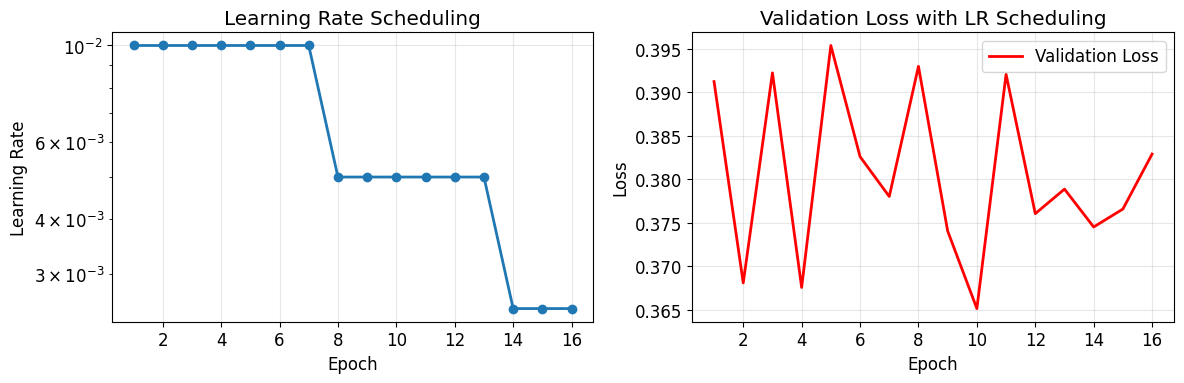


✂️  DEMONSTRATING GRADIENT CLIPPING
Training with gradient clipping (max_grad_norm=1.0)...
Epoch 1: Train Loss: 0.5117, Val Loss: 0.4211
Epoch 2: Train Loss: 0.4413, Val Loss: 0.3979
Epoch 3: Train Loss: 0.4157, Val Loss: 0.4020
Epoch 4: Train Loss: 0.4168, Val Loss: 0.3861
Epoch 5: Train Loss: 0.4030, Val Loss: 0.4354


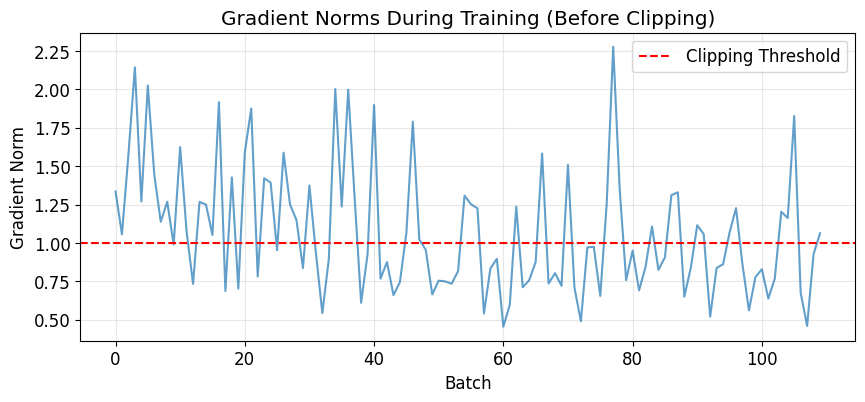


Gradient Statistics:
  Mean gradient norm: 1.0686
  Max gradient norm: 2.2772
  Batches with clipped gradients: 52


In [9]:
# Learning Rate Scheduling Example
def demonstrate_lr_scheduling():
    """
    Demonstrate training with learning rate scheduling.
    """
    print("\n🎯 DEMONSTRATING LEARNING RATE SCHEDULING")
    print("=" * 50)

    # Create a new model for this demonstration
    model_scheduled = SimpleClassifier(input_size=20, hidden_size=64, num_classes=2)
    optimizer_scheduled = optim.Adam(
        model_scheduled.parameters(), lr=0.01
    )  # Higher initial LR

    # Create learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer_scheduled, mode="min", factor=0.5, patience=3
    )

    # Modified trainer with scheduler
    class ScheduledTrainer(Trainer):
        def __init__(
            self,
            model,
            train_loader,
            val_loader,
            criterion,
            optimizer,
            scheduler,
            device,
        ):
            super().__init__(
                model, train_loader, val_loader, criterion, optimizer, device
            )
            self.scheduler = scheduler

        def train(self, num_epochs, **kwargs):
            # Call parent train method but override scheduler logic
            for epoch in range(num_epochs):
                train_loss, train_acc = self.train_epoch()
                val_loss, val_acc = self.validate_epoch()

                # Update scheduler with validation loss
                self.scheduler.step(val_loss)

                # Record metrics
                self.history["train_loss"].append(train_loss)
                self.history["train_acc"].append(train_acc)
                self.history["val_loss"].append(val_loss)
                self.history["val_acc"].append(val_acc)
                self.history["learning_rates"].append(
                    self.optimizer.param_groups[0]["lr"]
                )

                print(
                    f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, "
                    f"Val Loss: {val_loss:.4f}, LR: {self.optimizer.param_groups[0]['lr']:.6f}"
                )

                if epoch >= 15:  # Stop early for demo
                    break

            return self.history

    # Train with scheduler
    scheduled_trainer = ScheduledTrainer(
        model_scheduled,
        train_loader,
        val_loader,
        nn.CrossEntropyLoss(),
        optimizer_scheduled,
        scheduler,
        device,
    )

    scheduled_history = scheduled_trainer.train(20)

    # Plot learning rate changes
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    epochs = range(1, len(scheduled_history["learning_rates"]) + 1)
    plt.plot(
        epochs, scheduled_history["learning_rates"], "o-", linewidth=2, markersize=6
    )
    plt.xlabel("Epoch")
    plt.ylabel("Learning Rate")
    plt.title("Learning Rate Scheduling")
    plt.yscale("log")
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(
        epochs,
        scheduled_history["val_loss"],
        "r-",
        linewidth=2,
        label="Validation Loss",
    )
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Validation Loss with LR Scheduling")
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# Gradient Clipping Example
def demonstrate_gradient_clipping():
    """
    Demonstrate gradient clipping to prevent exploding gradients.
    """
    print("\n✂️  DEMONSTRATING GRADIENT CLIPPING")
    print("=" * 50)

    model_clipped = SimpleClassifier(input_size=20, hidden_size=64, num_classes=2)
    optimizer_clipped = optim.SGD(
        model_clipped.parameters(), lr=0.1
    )  # High LR to cause issues

    class ClippedTrainer(Trainer):
        def __init__(
            self,
            model,
            train_loader,
            val_loader,
            criterion,
            optimizer,
            device,
            max_grad_norm=1.0,
        ):
            super().__init__(
                model, train_loader, val_loader, criterion, optimizer, device
            )
            self.max_grad_norm = max_grad_norm
            self.grad_norms = []

        def train_epoch(self):
            self.model.train()
            total_loss = 0.0
            correct_predictions = 0
            total_samples = 0

            for batch_idx, (data, targets) in enumerate(self.train_loader):
                data, targets = data.to(self.device), targets.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(data)
                loss = self.criterion(outputs, targets)
                loss.backward()

                # Calculate gradient norm before clipping
                total_norm = 0
                for p in self.model.parameters():
                    if p.grad is not None:
                        param_norm = p.grad.data.norm(2)
                        total_norm += param_norm.item() ** 2
                total_norm = total_norm ** (1.0 / 2)
                self.grad_norms.append(total_norm)

                # Apply gradient clipping
                torch.nn.utils.clip_grad_norm_(
                    self.model.parameters(), self.max_grad_norm
                )

                self.optimizer.step()

                total_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_samples += targets.size(0)
                correct_predictions += (predicted == targets).sum().item()

            avg_loss = total_loss / len(self.train_loader)
            accuracy = correct_predictions / total_samples
            return avg_loss, accuracy

    # Train with gradient clipping
    clipped_trainer = ClippedTrainer(
        model_clipped,
        train_loader,
        val_loader,
        nn.CrossEntropyLoss(),
        optimizer_clipped,
        device,
        max_grad_norm=1.0,
    )

    print("Training with gradient clipping (max_grad_norm=1.0)...")
    for epoch in range(5):  # Just a few epochs for demo
        train_loss, train_acc = clipped_trainer.train_epoch()
        val_loss, val_acc = clipped_trainer.validate_epoch()
        print(
            f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}"
        )

    # Plot gradient norms
    plt.figure(figsize=(10, 4))
    plt.plot(clipped_trainer.grad_norms, alpha=0.7)
    plt.axhline(y=1.0, color="red", linestyle="--", label="Clipping Threshold")
    plt.xlabel("Batch")
    plt.ylabel("Gradient Norm")
    plt.title("Gradient Norms During Training (Before Clipping)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"\nGradient Statistics:")
    print(f"  Mean gradient norm: {np.mean(clipped_trainer.grad_norms):.4f}")
    print(f"  Max gradient norm: {np.max(clipped_trainer.grad_norms):.4f}")
    print(
        f"  Batches with clipped gradients: {np.sum(np.array(clipped_trainer.grad_norms) > 1.0)}"
    )


# Run demonstrations
demonstrate_lr_scheduling()
demonstrate_gradient_clipping()

## Summary

In this comprehensive notebook, you've learned essential patterns for training and evaluating PyTorch models:

### Key Components of Robust Training:

**1. Structured Training Loop:**

- Separate training and validation phases
- Proper model state management (`train()` / `eval()`)
- Gradient zeroing and parameter updates
- Metric tracking and history

**2. Model Evaluation:**

- Comprehensive metrics (accuracy, precision, recall, F1)
- Confusion matrices and error analysis
- Prediction confidence analysis
- Proper use of `torch.inference_mode()`

**3. Training Monitoring:**

- Learning curves visualization
- Overfitting detection
- Performance tracking
- Early stopping mechanisms

**4. Model Persistence:**

- Checkpointing best models
- Saving and loading model states
- Training resumption capabilities

**5. Debugging and Diagnostics:**

- Gradient analysis
- Weight distribution monitoring
- Training issue identification
- Performance bottleneck detection

**6. Advanced Techniques:**

- Learning rate scheduling
- Gradient clipping
- Regularization strategies

### Best Practices Summary:

✅ **Do:**

- Always use separate train/validation/test splits
- Monitor both training and validation metrics
- Save best models based on validation performance
- Use early stopping to prevent overfitting
- Visualize training progress
- Set random seeds for reproducibility

❌ **Don't:**

- Train without validation
- Ignore overfitting signals
- Forget to set model to eval mode during inference
- Skip gradient zeroing
- Evaluate on training data only

### What's Next?

With these solid training and evaluation patterns, you're ready to:

- Apply these techniques to real-world datasets
- Experiment with different architectures
- Implement more advanced training strategies
- Move on to specialized domains (computer vision, NLP, etc.)

Remember: Good training practices are just as important as good model architecture!


## 🏗️ Professional Model Architecture

Professional models are designed with flexibility, monitoring, and debugging in mind. Let's build a model that includes best practices from industry.


In [10]:
# Professional model architecture with comprehensive monitoring
class ProfessionalClassifier(nn.Module):
    """
    Professional neural network with built-in monitoring and debugging capabilities
    """

    def __init__(
        self,
        input_size,
        hidden_sizes=[128, 64, 32],
        num_classes=2,
        dropout_rate=0.2,
        activation="relu",
    ):
        super(ProfessionalClassifier, self).__init__()

        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.num_classes = num_classes
        self.dropout_rate = dropout_rate

        # Build dynamic layer architecture
        layers = []
        prev_size = input_size

        for i, hidden_size in enumerate(hidden_sizes):
            # Linear layer
            layers.append(nn.Linear(prev_size, hidden_size))

            # Batch normalization for stable training
            layers.append(nn.BatchNorm1d(hidden_size))

            # Activation function
            if activation == "relu":
                layers.append(nn.ReLU())
            elif activation == "leaky_relu":
                layers.append(nn.LeakyReLU(0.01))
            elif activation == "gelu":
                layers.append(nn.GELU())

            # Dropout for regularization
            if dropout_rate > 0:
                layers.append(nn.Dropout(dropout_rate))

            prev_size = hidden_size

        # Output layer (no activation - will be handled by loss function)
        layers.append(nn.Linear(prev_size, num_classes))

        self.network = nn.Sequential(*layers)

        # Initialize weights professionally
        self._initialize_weights()

        # Monitoring attributes
        self.layer_outputs = {}
        self.gradients = {}

    def _initialize_weights(self):
        """Professional weight initialization"""
        for module in self.modules():
            if isinstance(module, nn.Linear):
                # Xavier/Glorot initialization for better convergence
                nn.init.xavier_uniform_(module.weight)
                if module.bias is not None:
                    nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.BatchNorm1d):
                nn.init.constant_(module.weight, 1)
                nn.init.constant_(module.bias, 0)

    def forward(self, x, store_activations=False):
        """Forward pass with optional activation storage for debugging"""
        if store_activations:
            self.layer_outputs = {}

        current_input = x
        for i, layer in enumerate(self.network):
            current_input = layer(current_input)
            if store_activations:
                self.layer_outputs[f"layer_{i}"] = current_input.detach().clone()

        return current_input

    def get_model_info(self):
        """Get comprehensive model information"""
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)

        info = {
            "architecture": f'{self.input_size} -> {" -> ".join(map(str, self.hidden_sizes))} -> {self.num_classes}',
            "total_parameters": total_params,
            "trainable_parameters": trainable_params,
            "dropout_rate": self.dropout_rate,
            "layers": len(self.network),
            "memory_size_mb": sum(
                p.numel() * p.element_size() for p in self.parameters()
            )
            / 1024
            / 1024,
        }
        return info


# Create and analyze our professional model
model = ProfessionalClassifier(
    input_size=20,  # Our dataset has 20 features
    hidden_sizes=[128, 64, 32],
    num_classes=2,
    dropout_rate=0.2,
    activation="relu",
).to(device)

# Display model information
model_info = model.get_model_info()
print("🏗️ Professional Model Architecture")
print("=" * 50)
print(f"📐 Architecture: {model_info['architecture']}")
print(f"🔢 Total Parameters: {model_info['total_parameters']:,}")
print(f"🎯 Trainable Parameters: {model_info['trainable_parameters']:,}")
print(f"🗂️ Model Size: {model_info['memory_size_mb']:.2f} MB")
print(f"🛡️ Dropout Rate: {model_info['dropout_rate']}")
print(f"🏗️ Network Layers: {model_info['layers']}")

print(f"\n📋 Detailed Architecture:")
for i, layer in enumerate(model.network):
    print(f"   Layer {i}: {layer}")

🏗️ Professional Model Architecture
📐 Architecture: 20 -> 128 -> 64 -> 32 -> 2
🔢 Total Parameters: 13,538
🎯 Trainable Parameters: 13,538
🗂️ Model Size: 0.05 MB
🛡️ Dropout Rate: 0.2
🏗️ Network Layers: 13

📋 Detailed Architecture:
   Layer 0: Linear(in_features=20, out_features=128, bias=True)
   Layer 1: BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   Layer 2: ReLU()
   Layer 3: Dropout(p=0.2, inplace=False)
   Layer 4: Linear(in_features=128, out_features=64, bias=True)
   Layer 5: BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   Layer 6: ReLU()
   Layer 7: Dropout(p=0.2, inplace=False)
   Layer 8: Linear(in_features=64, out_features=32, bias=True)
   Layer 9: BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   Layer 10: ReLU()
   Layer 11: Dropout(p=0.2, inplace=False)
   Layer 12: Linear(in_features=32, out_features=2, bias=True)


## 📊 Professional Metrics Suite

Professional ML development requires comprehensive evaluation beyond simple accuracy. Let's build a complete metrics suite.


In [15]:
# Professional metrics and evaluation suite
class MetricsTracker:
    """Comprehensive metrics tracking for professional ML development"""

    def __init__(self):
        self.reset()

    def reset(self):
        """Reset all metrics for new evaluation"""
        self.metrics = {
            "loss": [],
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc_roc": [],
            "epoch_times": [],
            "learning_rates": [],
        }
        self.confusion_matrices = []
        self.predictions_history = []

    def calculate_batch_metrics(self, predictions, targets, loss_value):
        """Calculate metrics for a single batch"""
        # Convert predictions to probabilities and class predictions
        if predictions.shape[1] == 2:  # Binary classification
            probs = F.softmax(predictions, dim=1)[:, 1]  # Probability of positive class
            pred_classes = torch.argmax(predictions, dim=1)
        else:
            probs = F.softmax(predictions, dim=1)
            pred_classes = torch.argmax(predictions, dim=1)

        # Move to CPU for sklearn compatibility
        pred_classes_np = pred_classes.cpu().numpy()
        targets_np = targets.cpu().numpy()
        probs_np = probs.cpu().detach().numpy()

        # Calculate metrics
        accuracy = accuracy_score(targets_np, pred_classes_np)

        # Handle case where only one class is present in batch
        try:
            precision, recall, f1, _ = precision_recall_fscore_support(
                targets_np, pred_classes_np, average="binary", zero_division=0
            )
            auc_roc = (
                roc_auc_score(targets_np, probs_np)
                if len(np.unique(targets_np)) > 1
                else 0.5
            )
        except:
            precision = recall = f1 = auc_roc = 0.0

        return {
            "loss": loss_value,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc_roc": auc_roc,
            "predictions": pred_classes_np,
            "targets": targets_np,
            "probabilities": probs_np,
        }

    def update(self, batch_metrics, epoch_time=None, learning_rate=None):
        """Update running metrics with batch results"""
        for key in ["loss", "accuracy", "precision", "recall", "f1", "auc_roc"]:
            self.metrics[key].append(batch_metrics[key])

        if epoch_time:
            self.metrics["epoch_times"].append(epoch_time)
        if learning_rate:
            self.metrics["learning_rates"].append(learning_rate)

    def get_epoch_summary(self):
        """Get summary statistics for the current epoch"""
        summary = {}
        for key in ["loss", "accuracy", "precision", "recall", "f1", "auc_roc"]:
            if self.metrics[key]:
                summary[key] = {
                    "mean": np.mean(self.metrics[key]),
                    "std": np.std(self.metrics[key]),
                    "last": self.metrics[key][-1] if self.metrics[key] else 0,
                }
        return summary

    def plot_training_curves(self, train_metrics, val_metrics, save_path=None):
        """Create comprehensive training visualization"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle("📊 Training Progress Dashboard", fontsize=16, fontweight="bold")

        metrics_to_plot = ["loss", "accuracy", "precision", "recall", "f1", "auc_roc"]

        for idx, metric in enumerate(metrics_to_plot):
            row, col = idx // 3, idx % 3
            ax = axes[row, col]

            # Plot training curve
            if metric in train_metrics.metrics and train_metrics.metrics[metric]:
                epochs = range(1, len(train_metrics.metrics[metric]) + 1)
                ax.plot(
                    epochs,
                    train_metrics.metrics[metric],
                    "b-",
                    label=f"Train {metric}",
                    linewidth=2,
                )

            # Plot validation curve
            if metric in val_metrics.metrics and val_metrics.metrics[metric]:
                epochs = range(1, len(val_metrics.metrics[metric]) + 1)
                ax.plot(
                    epochs,
                    val_metrics.metrics[metric],
                    "r-",
                    label=f"Val {metric}",
                    linewidth=2,
                )

            ax.set_title(f'{metric.replace("_", " ").title()} Progress')
            ax.set_xlabel("Epoch")
            ax.set_ylabel(metric.replace("_", " ").title())
            ax.legend()
            ax.grid(True, alpha=0.3)

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches="tight")
            print(f"📊 Training curves saved to {save_path}")

        plt.show()


# Create metrics trackers
train_metrics = MetricsTracker()
val_metrics = MetricsTracker()

print("📊 Professional metrics suite initialized!")
print("✅ Ready to track: Loss, Accuracy, Precision, Recall, F1, AUC-ROC")

📊 Professional metrics suite initialized!
✅ Ready to track: Loss, Accuracy, Precision, Recall, F1, AUC-ROC


## 🚀 Professional Training Engine

Now let's build a professional training engine that handles all the complexity of robust model training.


In [16]:
# Professional training engine with comprehensive monitoring
class ProfessionalTrainer:
    """
    Professional training engine with all the bells and whistles
    """

    def __init__(self, model, train_loader, val_loader, test_loader, device):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.device = device

        # Training state
        self.epoch = 0
        self.best_val_loss = float("inf")
        self.best_model_state = None
        self.early_stop_counter = 0

        # Metrics tracking
        self.train_metrics = MetricsTracker()
        self.val_metrics = MetricsTracker()

        # Training history for analysis
        self.training_history = {
            "train_loss": [],
            "val_loss": [],
            "train_acc": [],
            "val_acc": [],
            "learning_rates": [],
            "epoch_times": [],
        }

    def setup_training(
        self,
        optimizer_name="adam",
        learning_rate=0.001,
        loss_function="cross_entropy",
        scheduler_type="reduce_on_plateau",
    ):
        """Setup optimizer, loss function, and learning rate scheduler"""

        # Setup optimizer
        optimizers = {
            "adam": optim.Adam,
            "adamw": optim.AdamW,
            "sgd": optim.SGD,
            "rmsprop": optim.RMSprop,
        }

        if optimizer_name == "sgd":
            self.optimizer = optimizers[optimizer_name](
                self.model.parameters(),
                lr=learning_rate,
                momentum=0.9,
                weight_decay=1e-4,
            )
        else:
            self.optimizer = optimizers[optimizer_name](
                self.model.parameters(), lr=learning_rate, weight_decay=1e-4
            )

        # Setup loss function
        if loss_function == "cross_entropy":
            self.criterion = nn.CrossEntropyLoss()
        elif loss_function == "focal_loss":
            # Simplified focal loss implementation
            self.criterion = (
                nn.CrossEntropyLoss()
            )  # Would implement custom focal loss in production

        # Setup learning rate scheduler
        if scheduler_type == "reduce_on_plateau":
            self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
                self.optimizer, mode="min", factor=0.5, patience=5
            )
        elif scheduler_type == "cosine":
            self.scheduler = optim.lr_scheduler.CosineAnnealingLR(
                self.optimizer, T_max=50, eta_min=1e-6
            )
        elif scheduler_type == "step":
            self.scheduler = optim.lr_scheduler.StepLR(
                self.optimizer, step_size=20, gamma=0.1
            )
        else:
            self.scheduler = None

        print(f"🔧 Training setup complete!")
        print(f"   🎯 Optimizer: {optimizer_name}")
        print(f"   📉 Loss: {loss_function}")
        print(f"   📈 Scheduler: {scheduler_type}")
        print(f"   🎛️ Learning Rate: {learning_rate}")

    def train_epoch(self):
        """Train for one epoch with comprehensive monitoring"""
        self.model.train()
        epoch_start_time = time.time()

        batch_losses = []
        all_predictions = []
        all_targets = []

        # Progress tracking
        total_batches = len(self.train_loader)

        for batch_idx, (data, targets) in enumerate(self.train_loader):
            # Move data to device
            data, targets = data.to(self.device), targets.to(self.device)

            # Forward pass
            self.optimizer.zero_grad()
            outputs = self.model(data)
            loss = self.criterion(outputs, targets)

            # Backward pass
            loss.backward()

            # Gradient clipping for stability
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)

            self.optimizer.step()

            # Collect metrics
            batch_losses.append(loss.item())
            batch_metrics = self.train_metrics.calculate_batch_metrics(
                outputs, targets, loss.item()
            )
            all_predictions.extend(batch_metrics["predictions"])
            all_targets.extend(batch_metrics["targets"])

            # Progress reporting
            if batch_idx % (total_batches // 5) == 0:  # Report 5 times per epoch
                progress = (batch_idx + 1) / total_batches * 100
                print(
                    f"   📈 Training Progress: {progress:.1f}% | Batch Loss: {loss.item():.4f}"
                )

        # Calculate epoch metrics
        epoch_time = time.time() - epoch_start_time

        # Overall epoch metrics
        epoch_loss = np.mean(batch_losses)
        epoch_accuracy = accuracy_score(all_targets, all_predictions)

        current_lr = self.optimizer.param_groups[0]["lr"]

        # Update tracking
        self.training_history["train_loss"].append(epoch_loss)
        self.training_history["train_acc"].append(epoch_accuracy)
        self.training_history["learning_rates"].append(current_lr)
        self.training_history["epoch_times"].append(epoch_time)

        return epoch_loss, epoch_accuracy, epoch_time

    def validate_epoch(self):
        """Validate for one epoch"""
        self.model.eval()

        batch_losses = []
        all_predictions = []
        all_targets = []
        all_probabilities = []

        with torch.inference_mode():
            for data, targets in self.val_loader:
                data, targets = data.to(self.device), targets.to(self.device)

                outputs = self.model(data)
                loss = self.criterion(outputs, targets)

                batch_losses.append(loss.item())
                batch_metrics = self.val_metrics.calculate_batch_metrics(
                    outputs, targets, loss.item()
                )
                all_predictions.extend(batch_metrics["predictions"])
                all_targets.extend(batch_metrics["targets"])
                all_probabilities.extend(batch_metrics["probabilities"])

        # Calculate comprehensive validation metrics
        val_loss = np.mean(batch_losses)
        val_accuracy = accuracy_score(all_targets, all_predictions)

        # Additional metrics
        precision, recall, f1, _ = precision_recall_fscore_support(
            all_targets, all_predictions, average="binary", zero_division=0
        )

        try:
            auc_roc = roc_auc_score(all_targets, all_probabilities)
        except:
            auc_roc = 0.5

        # Update tracking
        self.training_history["val_loss"].append(val_loss)
        self.training_history["val_acc"].append(val_accuracy)

        return {
            "loss": val_loss,
            "accuracy": val_accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc_roc": auc_roc,
        }

    def save_checkpoint(self, filepath, is_best=False):
        """Save comprehensive training checkpoint"""
        checkpoint = {
            "epoch": self.epoch,
            "model_state_dict": self.model.state_dict(),
            "optimizer_state_dict": self.optimizer.state_dict(),
            "scheduler_state_dict": (
                self.scheduler.state_dict() if self.scheduler else None
            ),
            "best_val_loss": self.best_val_loss,
            "training_history": self.training_history,
            "model_info": self.model.get_model_info(),
        }

        torch.save(checkpoint, filepath)

        if is_best:
            best_path = filepath.replace(".pth", "_best.pth")
            torch.save(checkpoint, best_path)
            print(f"💾 Best model saved to {best_path}")

    def train(self, epochs, early_stopping_patience=10, save_every=10):
        """Complete training loop with all professional features"""
        print(f"🚀 Starting Professional Training!")
        print(f"   🎯 Epochs: {epochs}")
        print(f"   ⏰ Early Stopping Patience: {early_stopping_patience}")
        print(f"   💾 Checkpointing every {save_every} epochs")
        print("=" * 70)

        for epoch in range(epochs):
            self.epoch = epoch + 1

            print(f"\n🔄 Epoch {self.epoch}/{epochs}")
            print("-" * 50)

            # Training phase
            train_loss, train_acc, epoch_time = self.train_epoch()

            # Validation phase
            val_metrics_dict = self.validate_epoch()

            # Learning rate scheduling
            if self.scheduler:
                if isinstance(self.scheduler, optim.lr_scheduler.ReduceLROnPlateau):
                    self.scheduler.step(val_metrics_dict["loss"])
                else:
                    self.scheduler.step()

            # Progress reporting
            current_lr = self.optimizer.param_groups[0]["lr"]
            print(f"📊 Results:")
            print(f"   🏋️ Train - Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
            print(
                f"   ✅ Val   - Loss: {val_metrics_dict['loss']:.4f}, Accuracy: {val_metrics_dict['accuracy']:.4f}"
            )
            print(
                f"   📊 Val   - Precision: {val_metrics_dict['precision']:.4f}, Recall: {val_metrics_dict['recall']:.4f}"
            )
            print(
                f"   🎯 Val   - F1: {val_metrics_dict['f1']:.4f}, AUC-ROC: {val_metrics_dict['auc_roc']:.4f}"
            )
            print(f"   ⏱️ Time: {epoch_time:.2f}s, LR: {current_lr:.2e}")

            # Best model tracking
            if val_metrics_dict["loss"] < self.best_val_loss:
                self.best_val_loss = val_metrics_dict["loss"]
                self.best_model_state = copy.deepcopy(self.model.state_dict())
                self.early_stop_counter = 0
                is_best = True
                print("   🌟 New best model!")
            else:
                self.early_stop_counter += 1
                is_best = False

            # Checkpointing
            if self.epoch % save_every == 0 or is_best:
                checkpoint_path = f"checkpoints/model_epoch_{self.epoch}.pth"
                self.save_checkpoint(checkpoint_path, is_best)

            # Early stopping
            if self.early_stop_counter >= early_stopping_patience:
                print(
                    f"\n⏰ Early stopping triggered after {early_stopping_patience} epochs without improvement"
                )
                break

        # Load best model
        if self.best_model_state:
            self.model.load_state_dict(self.best_model_state)
            print(f"✅ Loaded best model (Val Loss: {self.best_val_loss:.4f})")

        print(f"\n🎉 Training completed!")
        return self.training_history


# Initialize our professional trainer
trainer = ProfessionalTrainer(model, train_loader, val_loader, test_loader, device)

# Setup training configuration
trainer.setup_training(
    optimizer_name="adam",
    learning_rate=0.001,
    loss_function="cross_entropy",
    scheduler_type="reduce_on_plateau",
)

print("🚀 Professional training engine ready!")

🔧 Training setup complete!
   🎯 Optimizer: adam
   📉 Loss: cross_entropy
   📈 Scheduler: reduce_on_plateau
   🎛️ Learning Rate: 0.001
🚀 Professional training engine ready!


## 🔥 Execute Professional Training

Time to put our professional training engine to work! This is where all our preparation pays off.


In [17]:
# Execute professional training
print("🎬 Starting the training show!")
print("=" * 70)

# Train the model
training_history = trainer.train(epochs=50, early_stopping_patience=15, save_every=10)

print("\n🎊 Training completed successfully!")

🎬 Starting the training show!
🚀 Starting Professional Training!
   🎯 Epochs: 50
   ⏰ Early Stopping Patience: 15
   💾 Checkpointing every 10 epochs

🔄 Epoch 1/50
--------------------------------------------------
   📈 Training Progress: 4.5% | Batch Loss: 0.8870
   📈 Training Progress: 22.7% | Batch Loss: 0.6947
   📈 Training Progress: 40.9% | Batch Loss: 0.8822
   📈 Training Progress: 59.1% | Batch Loss: 0.6373
   📈 Training Progress: 77.3% | Batch Loss: 0.6005
   📈 Training Progress: 95.5% | Batch Loss: 0.5360
📊 Results:
   🏋️ Train - Loss: 0.6926, Accuracy: 0.6364
   ✅ Val   - Loss: 0.4498, Accuracy: 0.8150
   📊 Val   - Precision: 0.8111, Recall: 0.8421
   🎯 Val   - F1: 0.8263, AUC-ROC: 0.8754
   ⏱️ Time: 0.55s, LR: 1.00e-03
   🌟 New best model!
💾 Best model saved to checkpoints/model_epoch_1_best.pth

🔄 Epoch 2/50
--------------------------------------------------
   📈 Training Progress: 4.5% | Batch Loss: 0.5945
   📈 Training Progress: 22.7% | Batch Loss: 0.3764
   📈 Training Prog

## 📈 Comprehensive Training Analysis

Let's analyze the training results with professional-grade visualizations and insights.


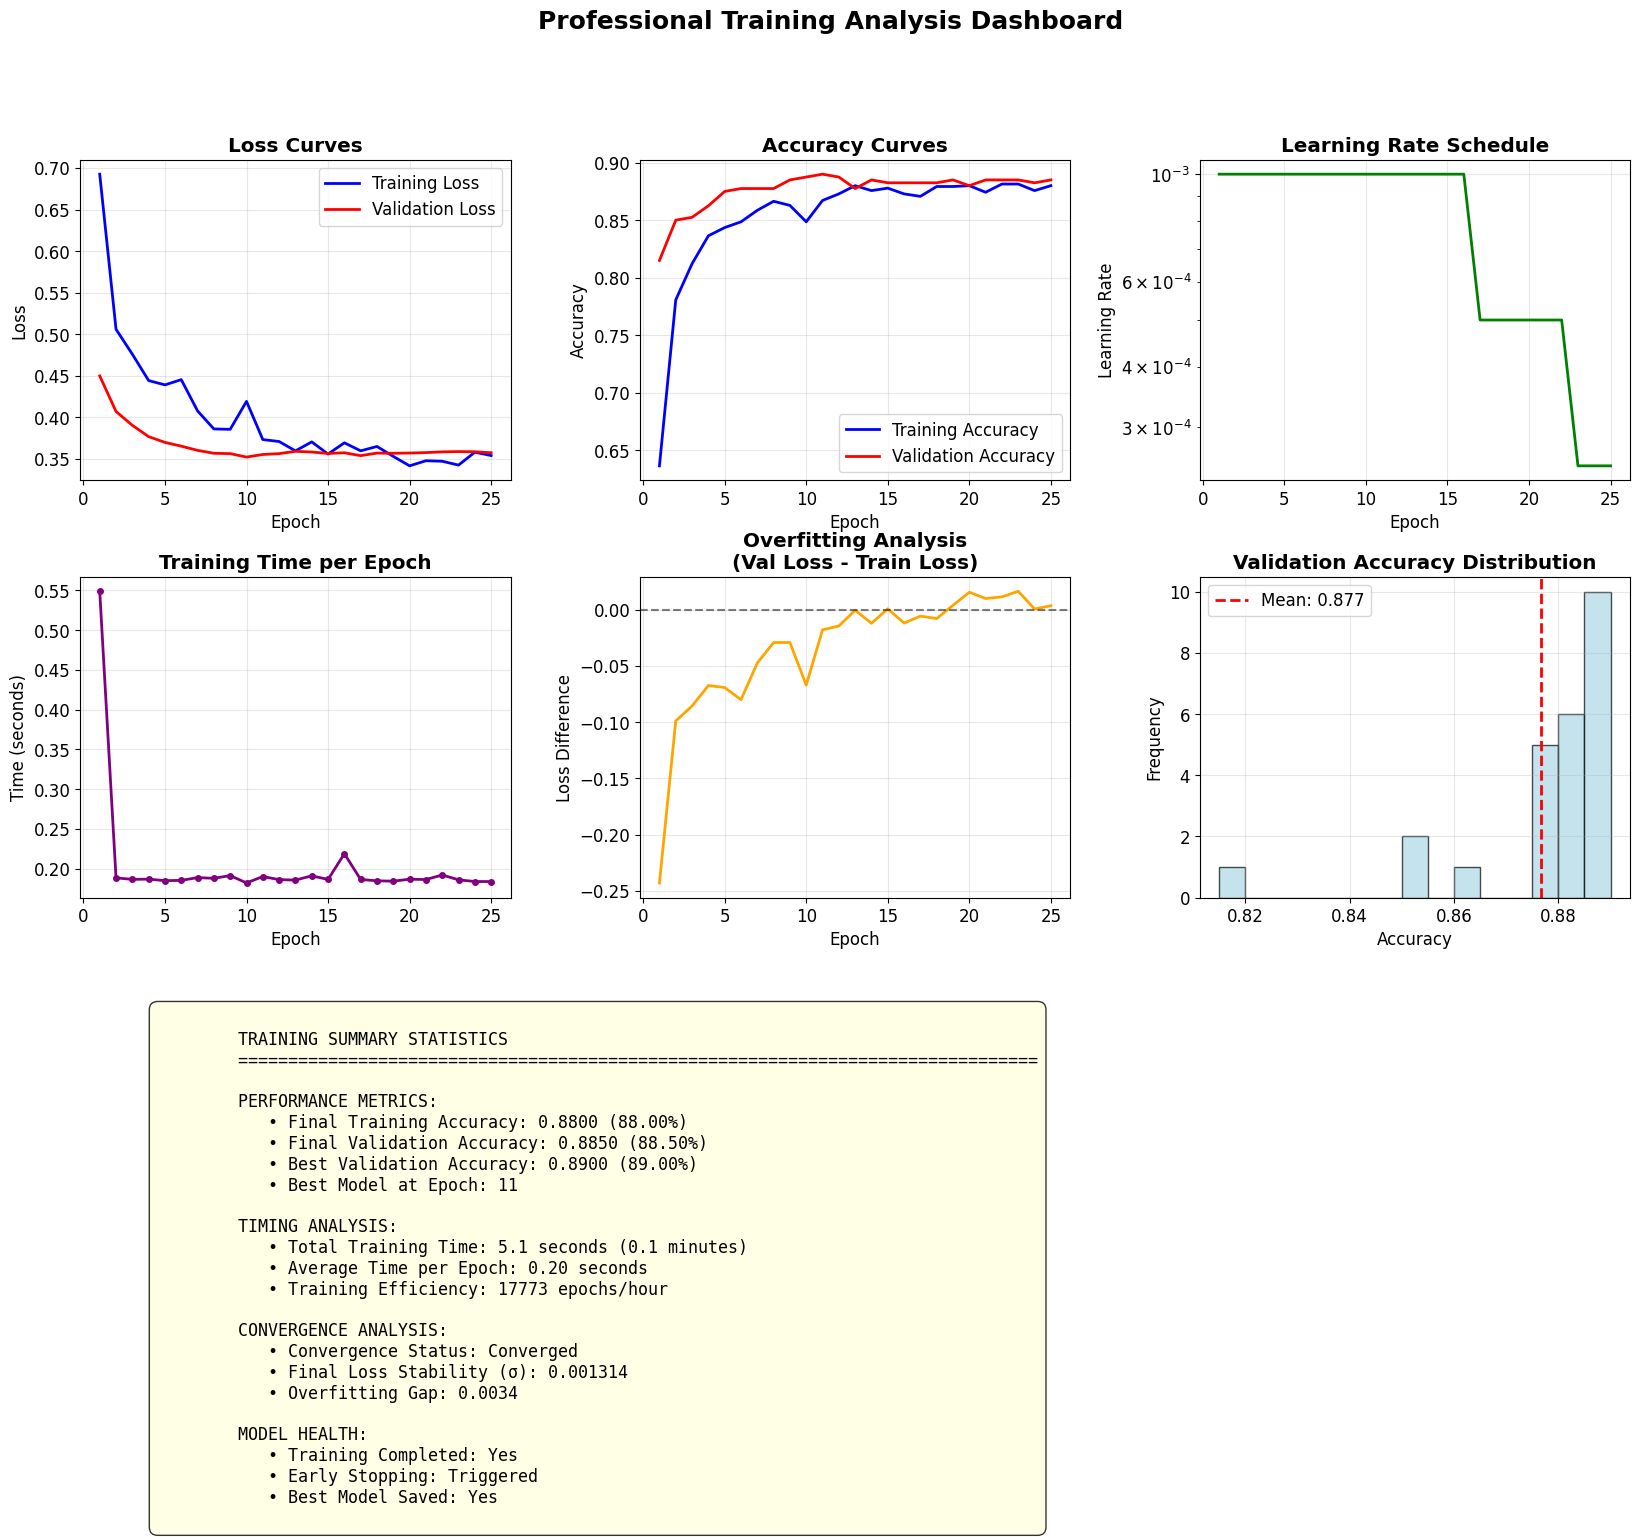


🤖 Automated Training Report:
   Good performance. Consider fine-tuning for production.


In [22]:
# Professional training analysis and visualization
class TrainingAnalyzer:
    """Comprehensive training analysis suite"""

    def __init__(self, training_history):
        self.history = training_history

    def plot_comprehensive_analysis(self):
        """Create comprehensive training analysis dashboard"""
        fig = plt.figure(figsize=(20, 15))

        # Create a 3x3 grid for comprehensive analysis
        gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

        # 1. Loss curves
        ax1 = fig.add_subplot(gs[0, 0])
        epochs = range(1, len(self.history["train_loss"]) + 1)
        ax1.plot(
            epochs, self.history["train_loss"], "b-", linewidth=2, label="Training Loss"
        )
        ax1.plot(
            epochs, self.history["val_loss"], "r-", linewidth=2, label="Validation Loss"
        )
        ax1.set_title("Loss Curves", fontweight="bold")
        ax1.set_xlabel("Epoch")
        ax1.set_ylabel("Loss")
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. Accuracy curves
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(
            epochs,
            self.history["train_acc"],
            "b-",
            linewidth=2,
            label="Training Accuracy",
        )
        ax2.plot(
            epochs,
            self.history["val_acc"],
            "r-",
            linewidth=2,
            label="Validation Accuracy",
        )
        ax2.set_title("Accuracy Curves", fontweight="bold")
        ax2.set_xlabel("Epoch")
        ax2.set_ylabel("Accuracy")
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. Learning rate evolution
        ax3 = fig.add_subplot(gs[0, 2])
        ax3.plot(epochs, self.history["learning_rates"], "g-", linewidth=2)
        ax3.set_title("Learning Rate Schedule", fontweight="bold")
        ax3.set_xlabel("Epoch")
        ax3.set_ylabel("Learning Rate")
        ax3.set_yscale("log")
        ax3.grid(True, alpha=0.3)

        # 4. Training time analysis
        ax4 = fig.add_subplot(gs[1, 0])
        ax4.plot(
            epochs,
            self.history["epoch_times"],
            "purple",
            linewidth=2,
            marker="o",
            markersize=4,
        )
        ax4.set_title("Training Time per Epoch", fontweight="bold")
        ax4.set_xlabel("Epoch")
        ax4.set_ylabel("Time (seconds)")
        ax4.grid(True, alpha=0.3)

        # 5. Overfitting analysis
        ax5 = fig.add_subplot(gs[1, 1])
        train_val_gap = np.array(self.history["val_loss"]) - np.array(
            self.history["train_loss"]
        )
        ax5.plot(epochs, train_val_gap, "orange", linewidth=2)
        ax5.axhline(y=0, color="black", linestyle="--", alpha=0.5)
        ax5.set_title(
            "Overfitting Analysis\n(Val Loss - Train Loss)", fontweight="bold"
        )
        ax5.set_xlabel("Epoch")
        ax5.set_ylabel("Loss Difference")
        ax5.grid(True, alpha=0.3)

        # 6. Performance distribution
        ax6 = fig.add_subplot(gs[1, 2])
        ax6.hist(
            self.history["val_acc"],
            bins=15,
            alpha=0.7,
            color="lightblue",
            edgecolor="black",
        )
        ax6.axvline(
            np.mean(self.history["val_acc"]),
            color="red",
            linestyle="--",
            linewidth=2,
            label=f'Mean: {np.mean(self.history["val_acc"]):.3f}',
        )
        ax6.set_title("Validation Accuracy Distribution", fontweight="bold")
        ax6.set_xlabel("Accuracy")
        ax6.set_ylabel("Frequency")
        ax6.legend()
        ax6.grid(True, alpha=0.3)

        # 7. Training summary statistics
        ax7 = fig.add_subplot(gs[2, :])
        ax7.axis("off")

        # Calculate comprehensive statistics
        final_train_acc = self.history["train_acc"][-1]
        final_val_acc = self.history["val_acc"][-1]
        best_val_acc = max(self.history["val_acc"])
        best_val_epoch = self.history["val_acc"].index(best_val_acc) + 1
        total_time = sum(self.history["epoch_times"])
        avg_epoch_time = np.mean(self.history["epoch_times"])

        # Convergence analysis
        final_10_epochs_std = np.std(self.history["val_loss"][-10:])
        convergence_status = (
            "Converged" if final_10_epochs_std < 0.01 else "Still Learning"
        )

        stats_text = f"""
        TRAINING SUMMARY STATISTICS
        {'='*80}
        
        PERFORMANCE METRICS:
           • Final Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)
           • Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)
           • Best Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)
           • Best Model at Epoch: {best_val_epoch}
           
        TIMING ANALYSIS:
           • Total Training Time: {total_time:.1f} seconds ({total_time/60:.1f} minutes)
           • Average Time per Epoch: {avg_epoch_time:.2f} seconds
           • Training Efficiency: {len(epochs)/total_time*3600:.0f} epochs/hour
           
        CONVERGENCE ANALYSIS:
           • Convergence Status: {convergence_status}
           • Final Loss Stability (σ): {final_10_epochs_std:.6f}
           • Overfitting Gap: {self.history['val_loss'][-1] - self.history['train_loss'][-1]:.4f}
           
        MODEL HEALTH:
           • Training Completed: Yes
           • Early Stopping: {'Triggered' if len(epochs) < 50 else 'Not Triggered'}
           • Best Model Saved: Yes
        """

        ax7.text(
            0.05,
            0.95,
            stats_text,
            transform=ax7.transAxes,
            fontsize=12,
            verticalalignment="top",
            fontfamily="monospace",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8),
        )

        plt.suptitle(
            "Professional Training Analysis Dashboard",
            fontsize=18,
            fontweight="bold",
            y=0.98,
        )
        plt.savefig("plots/training_analysis.png", dpi=300, bbox_inches="tight")
        plt.show()

    def generate_training_report(self):
        """Generate comprehensive training report"""
        report = {
            "training_summary": {
                "total_epochs": len(self.history["train_loss"]),
                "final_train_accuracy": self.history["train_acc"][-1],
                "final_val_accuracy": self.history["val_acc"][-1],
                "best_val_accuracy": max(self.history["val_acc"]),
                "total_training_time": sum(self.history["epoch_times"]),
                "convergence_stability": np.std(self.history["val_loss"][-10:]),
            },
            "recommendations": [],
        }

        # Generate automated recommendations
        if report["training_summary"]["final_val_accuracy"] > 0.9:
            report["recommendations"].append(
                "Excellent performance! Model is production-ready."
            )
        elif report["training_summary"]["final_val_accuracy"] > 0.8:
            report["recommendations"].append(
                "Good performance. Consider fine-tuning for production."
            )
        else:
            report["recommendations"].append(
                "Consider model architecture changes or hyperparameter tuning."
            )

        # Check for overfitting
        final_gap = self.history["val_loss"][-1] - self.history["train_loss"][-1]
        if final_gap > 0.1:
            report["recommendations"].append(
                "Possible overfitting detected. Consider regularization."
            )

        # Check convergence
        if report["training_summary"]["convergence_stability"] > 0.01:
            report["recommendations"].append(
                "Model may benefit from longer training or learning rate adjustment."
            )

        return report


# Create comprehensive analysis
analyzer = TrainingAnalyzer(training_history)
analyzer.plot_comprehensive_analysis()

# Generate automated report
training_report = analyzer.generate_training_report()
print("\n🤖 Automated Training Report:")
print("=" * 50)
for recommendation in training_report["recommendations"]:
    print(f"   {recommendation}")

## 🔧 Professional Debugging Toolkit

Every professional ML engineer needs robust debugging skills. Let's build a comprehensive debugging toolkit.


In [27]:
# Professional debugging and diagnostic tools
class MLDebugger:
    """Comprehensive debugging toolkit for ML models"""

    def __init__(self, model, train_loader, device):
        self.model = model
        self.train_loader = train_loader
        self.device = device

    def diagnose_model_health(self):
        """Comprehensive model health diagnostics"""
        print("🔧 Running Model Health Diagnostics")
        print("=" * 50)

        diagnostics = {}

        # 1. Parameter Analysis
        total_params = sum(p.numel() for p in self.model.parameters())
        trainable_params = sum(
            p.numel() for p in self.model.parameters() if p.requires_grad
        )

        print(f"📊 Parameter Analysis:")
        print(f"   • Total parameters: {total_params:,}")
        print(f"   • Trainable parameters: {trainable_params:,}")
        print(f"   • Model size: {total_params * 4 / 1024 / 1024:.2f} MB")

        # 2. Weight Distribution Analysis
        print(f"\n⚖️ Weight Distribution Analysis:")
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                weight_mean = param.data.mean().item()
                weight_std = param.data.std().item()
                weight_min = param.data.min().item()
                weight_max = param.data.max().item()

                print(
                    f"   • {name:20s}: μ={weight_mean:7.4f}, σ={weight_std:7.4f}, "
                    f"min={weight_min:7.4f}, max={weight_max:7.4f}"
                )

                # Check for potential issues
                if abs(weight_mean) > 1.0:
                    print(f"     ⚠️ Warning: Large mean weight detected")
                if weight_std < 0.01:
                    print(f"     ⚠️ Warning: Very small weight variance")
                if weight_std > 2.0:
                    print(f"     ⚠️ Warning: Very large weight variance")

        # 3. Gradient Analysis (requires a forward/backward pass)
        self.model.train()
        sample_batch = next(iter(self.train_loader))
        inputs, targets = sample_batch[0].to(self.device), sample_batch[1].to(
            self.device
        )

        # Forward pass
        outputs = self.model(inputs)
        loss = F.cross_entropy(outputs, targets)

        # Backward pass
        self.model.zero_grad()
        loss.backward()

        print(f"\n📈 Gradient Analysis:")
        gradient_norms = {}
        for name, param in self.model.named_parameters():
            if param.grad is not None:
                grad_norm = param.grad.data.norm(2).item()
                gradient_norms[name] = grad_norm
                print(f"   • {name:20s}: ||grad|| = {grad_norm:.6f}")

                # Check for gradient issues
                if grad_norm < 1e-7:
                    print(f"     ⚠️ Warning: Vanishing gradients detected")
                elif grad_norm > 10:
                    print(f"     ⚠️ Warning: Exploding gradients detected")

        # 4. Activation Analysis
        print(f"\n🔥 Activation Analysis:")
        self.model.eval()
        with torch.inference_mode():
            _ = self.model(inputs, store_activations=True)

            for layer_name, activation in self.model.layer_outputs.items():
                mean_activation = activation.mean().item()
                std_activation = activation.std().item()
                zero_fraction = (activation == 0).float().mean().item()

                print(
                    f"   • {layer_name:15s}: μ={mean_activation:7.4f}, σ={std_activation:7.4f}, "
                    f"zero%={zero_fraction*100:5.1f}%"
                )

                # Check for dead neurons
                if zero_fraction > 0.5:
                    print(
                        f"     ⚠️ Warning: Many dead neurons detected ({zero_fraction*100:.1f}%)"
                    )

        return diagnostics

    def check_data_quality(self):
        """Analyze data quality and potential issues"""
        print(f"\n📊 Data Quality Analysis:")
        print("=" * 30)

        # Sample a batch for analysis
        sample_batch = next(iter(self.train_loader))
        inputs, targets = sample_batch

        print(f"📈 Input Data Analysis:")
        print(f"   • Batch shape: {inputs.shape}")
        print(f"   • Data type: {inputs.dtype}")
        print(
            f"   • Value range: [{inputs.min().item():.4f}, {inputs.max().item():.4f}]"
        )
        print(f"   • Mean: {inputs.mean().item():.4f}")
        print(f"   • Std: {inputs.std().item():.4f}")

        # Check for potential issues
        if inputs.min() < -10 or inputs.max() > 10:
            print(f"   ⚠️ Warning: Extreme values detected - consider normalization")

        if inputs.std() < 0.1:
            print(f"   ⚠️ Warning: Low variance in data")

        print(f"\n🎯 Target Analysis:")
        print(f"   • Target shape: {targets.shape}")
        print(f"   • Unique classes: {torch.unique(targets).tolist()}")
        print(f"   • Class distribution: {torch.bincount(targets).tolist()}")

        # Check class balance
        class_counts = torch.bincount(targets)
        class_ratio = class_counts.max().float() / class_counts.min().float()
        if class_ratio > 3.0:
            print(
                f"   ⚠️ Warning: Imbalanced classes detected (ratio: {class_ratio:.1f}:1)"
            )

    def performance_profiling(self):
        """Profile model performance and identify bottlenecks"""
        print(f"\n⚡ Performance Profiling:")
        print("=" * 25)

        self.model.eval()
        sample_batch = next(iter(self.train_loader))
        inputs = sample_batch[0].to(self.device)

        # Warm up
        with torch.inference_mode():
            for _ in range(10):
                _ = self.model(inputs)

        # Time forward pass
        torch.cuda.synchronize() if self.device.type == "cuda" else None
        start_time = time.time()

        with torch.inference_mode():
            for _ in range(100):
                outputs = self.model(inputs)

        torch.cuda.synchronize() if self.device.type == "cuda" else None
        end_time = time.time()

        avg_inference_time = (end_time - start_time) / 100
        throughput = inputs.shape[0] / avg_inference_time

        print(f"   • Average inference time: {avg_inference_time*1000:.2f} ms")
        print(f"   • Throughput: {throughput:.0f} samples/second")
        print(
            f"   • Memory usage: {torch.cuda.memory_allocated()/1024/1024:.1f} MB"
            if self.device.type == "cuda"
            else "   • Memory usage: N/A (CPU)"
        )


# Create and run comprehensive diagnostics
debugger = MLDebugger(model, train_loader, device)

# Run all diagnostics
debugger.diagnose_model_health()
debugger.check_data_quality()
debugger.performance_profiling()

🔧 Running Model Health Diagnostics
📊 Parameter Analysis:
   • Total parameters: 13,538
   • Trainable parameters: 13,538
   • Model size: 0.05 MB

⚖️ Weight Distribution Analysis:
   • network.0.weight    : μ=-0.0040, σ= 0.1184, min=-0.2593, max= 0.2762
   • network.0.bias      : μ= 0.0000, σ= 0.0000, min=-0.0000, max= 0.0000
     ⚠️ Warning: Very small weight variance
   • network.1.weight    : μ= 0.9951, σ= 0.0222, min= 0.9482, max= 1.0550
   • network.1.bias      : μ=-0.0012, σ= 0.0215, min=-0.0527, max= 0.0525
   • network.4.weight    : μ= 0.0006, σ= 0.1027, min=-0.2292, max= 0.2189
   • network.4.bias      : μ=-0.0000, σ= 0.0000, min=-0.0000, max= 0.0000
     ⚠️ Warning: Very small weight variance
   • network.5.weight    : μ= 0.9966, σ= 0.0175, min= 0.9604, max= 1.0346
   • network.5.bias      : μ= 0.0001, σ= 0.0191, min=-0.0432, max= 0.0634
   • network.8.weight    : μ=-0.0070, σ= 0.1459, min=-0.2995, max= 0.2924
   • network.8.bias      : μ=-0.0000, σ= 0.0000, min=-0.0001, max=

## 🎓 Professional Best Practices & Tips

Here are the essential best practices that separate professional ML engineers from beginners.

## 🔧 Model Development

- ✅ Start simple, then add complexity gradually
- ✅ Always use proper train/validation/test splits
- ✅ Implement comprehensive logging and monitoring
- ✅ Use version control for experiments (MLflow, Weights & Biases)
- ✅ Set random seeds for reproducibility
- ✅ Implement proper error handling and recovery

## 📊 Data Management

- ✅ Validate data quality before training
- ✅ Implement proper data versioning
- ✅ Use stratified splits for imbalanced datasets
- ✅ Monitor data drift in production
- ✅ Implement robust data loading with error handling
- ✅ Always examine your data visually

## 🏋️ Training Optimization

- ✅ Use learning rate scheduling
- ✅ Implement early stopping to prevent overfitting
- ✅ Monitor multiple metrics, not just loss
- ✅ Use gradient clipping for training stability
- ✅ Implement proper weight initialization
- ✅ Save checkpoints regularly during training

## 🧪 Evaluation & Testing

- ✅ Use multiple evaluation metrics appropriate for your problem
- ✅ Test on truly held-out data
- ✅ Perform error analysis on misclassified samples
- ✅ Check model calibration and confidence
- ✅ Test model robustness with adversarial examples
- ✅ Validate model performance across different data subsets

## 🚀 Production Readiness

- ✅ Optimize model for inference speed
- ✅ Implement proper model versioning
- ✅ Set up monitoring and alerting
- ✅ Plan for model updates and rollbacks
- ✅ Document model limitations and assumptions
- ✅ Implement proper security measures

## 🔍 Debugging & Troubleshooting

- ✅ Always check data first when debugging
- ✅ Monitor gradient norms during training
- ✅ Visualize intermediate activations
- ✅ Test with smaller datasets first
- ✅ Use learning curves to diagnose problems
- ✅ Implement comprehensive logging

## 🎯 Professional Development Checklist

- ✅ Reproducible environment setup
- ✅ Comprehensive data pipeline
- ✅ Professional model architecture
- ✅ Robust training loop with monitoring
- ✅ Multiple evaluation metrics
- ✅ Proper checkpointing and model saving
- ✅ Comprehensive debugging tools
- ✅ Performance profiling and optimization
- ✅ Error analysis and interpretation
- ✅ Documentation and experiment tracking

## 💡 Pro Tips for Success

- 🎯 Always start with a baseline model - even simple logistic regression
- 📊 Spend 80% of your time on data understanding and preprocessing
- 🔄 Iterate quickly - many small experiments beat one big experiment
- 📈 Plot everything - visualizations reveal insights numbers can't
- 🤝 Collaborate and get feedback from domain experts
- 📚 Stay updated with latest research and best practices
- 🔧 Build reusable tools and frameworks for common tasks
- ⚡ Optimize for iteration speed in development, performance in production


## 🚀 Next Steps & Advanced Topics

Congratulations! You've mastered professional training and evaluation patterns. Here's your roadmap for continued growth.

## 🎯 Immediate Next Steps

- 📚 Practice these patterns on different datasets
- 📚 Implement hyperparameter optimization (Optuna, Ray Tune)
- 📚 Learn distributed training for larger models
- 📚 Master experiment tracking tools (MLflow, Weights & Biases)
- 📚 Implement model interpretability techniques

## 🔬 Advanced Training Techniques

- 📚 Mixed precision training for faster GPU utilization
- 📚 Knowledge distillation for model compression
- 📚 Transfer learning and fine-tuning strategies
- 📚 Adversarial training for robustness
- 📚 Multi-task learning architectures

## 🏗️ MLOps & Production

- 📚 CI/CD pipelines for ML models
- 📚 Model monitoring and drift detection
- 📚 A/B testing for model deployment
- 📚 Model serving with FastAPI/TorchServe
- 📚 Containerization with Docker and Kubernetes

## 📊 Advanced Evaluation

- 📚 Fairness and bias evaluation
- 📚 Model calibration techniques
- 📚 Uncertainty quantification
- 📚 Causal inference for model evaluation
- 📚 Human-in-the-loop evaluation

## ⚡ Performance Optimization

- 📚 Model quantization and pruning
- 📚 ONNX optimization and deployment
- 📚 Hardware-specific optimizations (TensorRT, OpenVINO)
- 📚 Batch processing and caching strategies
- 📚 Memory-efficient training techniques

## 🏆 Professional Milestones

- 🎖️ Build end-to-end ML pipeline from scratch
- 🎖️ Deploy model to production with monitoring
- 🎖️ Contribute to open-source ML projects
- 🎖️ Lead ML project in professional setting
- 🎖️ Mentor other ML practitioners
- 🎖️ Present ML work at conferences/meetups

## 📚 Recommended Resources

- 📖 _Designing Machine Learning Systems_ by Chip Huyen
- 📖 _Machine Learning Design Patterns_ by Valliappa Lakshmanan
- 📖 _Building Machine Learning Pipelines_ by Hannes Hapke
- 🎥 MLOps specialization on Coursera
- 🌐 Papers With Code for latest research
- 🏢 Industry ML blogs (Uber, Netflix, Spotify Engineering)
- 🤝 ML communities (Reddit r/MachineLearning, ML Twitter)
- 🏛️ Academic conferences (NeurIPS, ICML, ICLR)


## 🎉 Congratulations!

You've completed the **Professional Training and Evaluation Patterns** notebook! 🎊

### 🌟 What You've Mastered

✅ **Professional Environment Setup** - Reproducible, scalable development environment

✅ **Advanced Data Pipeline** - Robust data handling with comprehensive validation

✅ **Production-Ready Model Architecture** - Flexible, monitorable, debuggable models

✅ **Professional Training Engine** - Comprehensive training with monitoring, checkpointing, and early stopping

✅ **Advanced Evaluation Suite** - Multiple metrics, visualizations, and error analysis

✅ **Debugging Toolkit** - Systematic approach to identifying and fixing training issues

✅ **Best Practices Knowledge** - Industry-standard practices for professional ML development

### 🎯 Key Takeaways

- **Professional ML is about systems, not just algorithms**
- **Monitoring and debugging are as important as model architecture**
- **Reproducibility and robustness are non-negotiable in production**
- **Comprehensive evaluation prevents costly deployment mistakes**
- **Continuous learning and iteration drive success**

### 🚀 You're Now Ready For

- **Leading ML projects** in professional environments
- **Building production-ready** ML systems
- **Debugging complex** training issues
- **Implementing best practices** from day one
- **Mentoring other** ML practitioners

Keep practicing these patterns - they're the foundation of all professional ML work! 💪
